# Running

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as prp

pd.set_option('display.max_columns', None)

train = pd.read_csv("train_dataset_hackathon_mkb.csv", delimiter = ';', encoding = 'cp1251')
test = pd.read_csv("test_dataset_hackathon_mkb.csv", delimiter = ';', encoding = 'cp1251')

print(f'shape:{train.shape}')
train.head(5)

shape:(17891, 124)


,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,F2340,F2350,F2400,F2410,F1150_LAG1,F1230_LAG1,F1410_LAG1,F1510_LAG1,F1520_LAG1,F2110_LAG1,F2120_LAG1,F2200_LAG1,F2210_LAG1,F2220_LAG1,F2300_LAG1,F2320_LAG1,F2330_LAG1,F2400_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,NaN,21224000.0,1.048287e+10,105901000.0,127510000.0,9.477348e+09,440671000.0,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,1.083075e+09,656055000.0,8.834700e+07,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,3.908700e+07,-19204000.0,1.031700e+09,9.179060e+09,NaN,2.112180e+09,7.426504e+09,4.955724e+10,4.648680e+10,5.565080e+08,1.424790e+09,1.089145e+09,2.401140e+08,137626000.0,310096000.0,7.625800e+07,1.0,10AUG1993:00:00:00,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,3.0,40.0,3.701000e+09,40.0,1001 .. 5000,01JUL2006:00:00:00,01JAN1960:00:00:00,5.0,1.0,0.0,8.0,7.0,7.0,3.0,0.0,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,NaN,NaN,2.161000e+07,2378000.0,NaN,1.764200e+07,1000000.0,5.530000e+05,37000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,4.171000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,NaN,6746000.0,1.190000e+06,NaN,50000.0,NaN,6.500000e+04,1.494000e+06,6.550000e+05,NaN,7.067400e+07,1.825700e+07,NaN,NaN,3.764000e+06,5.134000e+07,4.299900e+07,3.249000e+06,NaN,5.092000e+06,1.265000e+06,NaN,NaN,6.800000e+05,1.0,04FEB1992:00:00:00,Государственная собственность,Коммерческая унитарная организация,Группировки хозяйствующих субъектов и обществе...,33.0,33.0,3.371000e+10,33.0,51 .. 100,30AUG2002:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.00.

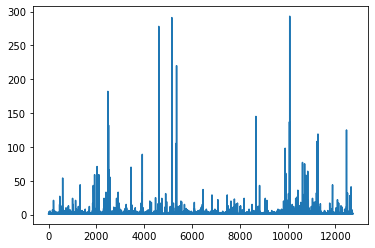

In [17]:
plt.plot(train.groupby('id_client')['id_contract'].count())

# FE

features classification

In [2]:
# train.drop(['OKVED_CODE','OKTMO_CODE'], axis = 1, inplace = True)
# test.drop(['OKVED_CODE','OKTMO_CODE'], axis = 1, inplace = True)

In [2]:
date_columns = ['SIGN_DATE','DATEFIRSTREG','TAXREGPAY_REGDATE','TAXREG_REGDATE']
bin_columns = ['IP_flag','EGRPOINCLUDED',]
cat_columns = ['OKFS_GROUP','OKOPF_GROUP','OKOGU_GROUP','OKATO_FED','OKTMO_FED','WORKERSRANGE']

real_F, real_F_L = [], []
for name in train.columns.values:
    if name[0] == 'F' and name[-1] == '0': real_F.append(name)
    if name[0] == 'F' and name[-1] == '1': real_F_L.append(name)
        
real_columns = ['COUNTCOOWNERFCSM','COUNTCOOWNERROSSTAT','COUNTCOOWNEREGRUL',
        'COUNTBRANCH','COUNTBRANCHROSSTAT','COUNTBRANCHEGRUL',
       'TELEPHONECOUNT','MANAGERCOUNTINCOUNTRY','MANAGERCOUNTINREGION','MANAGERINNCOUNT']

real_take_part_year = ['PLAINTIFF_CASESNUMBER_YEAR','PLAINTIFF_SUM_YEAR','DEFENDANT_CASESNUMBER_YEAR','DEFENDANT_SUM_YEAR','THIRDOROTHERPERSON_YEAR']
real_take_part_all_time = ['PLAINTIFF_CASESNUMBER_EVER','PLAINTIFF_SUM_EVER','DEFENDANT_CASESNUMBER_EVER','DEFENDANT_SUM_EVER','THIRDOROTHERPERSON_EVER']
real_data_233 = ['ADMITTEDNUMBER_233_YEAR', 'NOTADMITTEDNUMBER_233_YEAR', 'WINNERNUMBER_233_YEAR','SIGNEDNUMBER_233_YEAR','SUM_233_YEAR',
                 'ADMITTEDNUMBER_233_EVER','NOTADMITTEDNUMBER_233_EVER','WINNERNUMBER_233_EVER','SIGNEDNUMBER_233_EVER','SUM_233_EVER']
real_data_95 = ['ADMITTEDNUMBER_95_YEAR', 'NOTADMITTEDNUMBER_95_YEAR', 'WINNERNUMBER_95_YEAR','SIGNEDNUMBER_95_YEAR','SUM_95_YEAR',
                 'ADMITTEDNUMBER_95_EVER','NOTADMITTEDNUMBER_EVER','WINNERNUMBER_95_EVER','SIGNEDNUMBER_95_EVER','SUM_95_EVER']

real_columns_all = real_F + real_F_L + real_columns + real_take_part_year + real_take_part_all_time + real_data_233 + real_data_95

others = ['OKATO_REGIONCODE',
          'FLAG_DISQUALIFICATION','COUNT_CHANGE_YEAR','COUNT_CHANGE_EVER','BIRTHDATE','AGE','SEX_NAME','CITIZENSHIP_NAME']

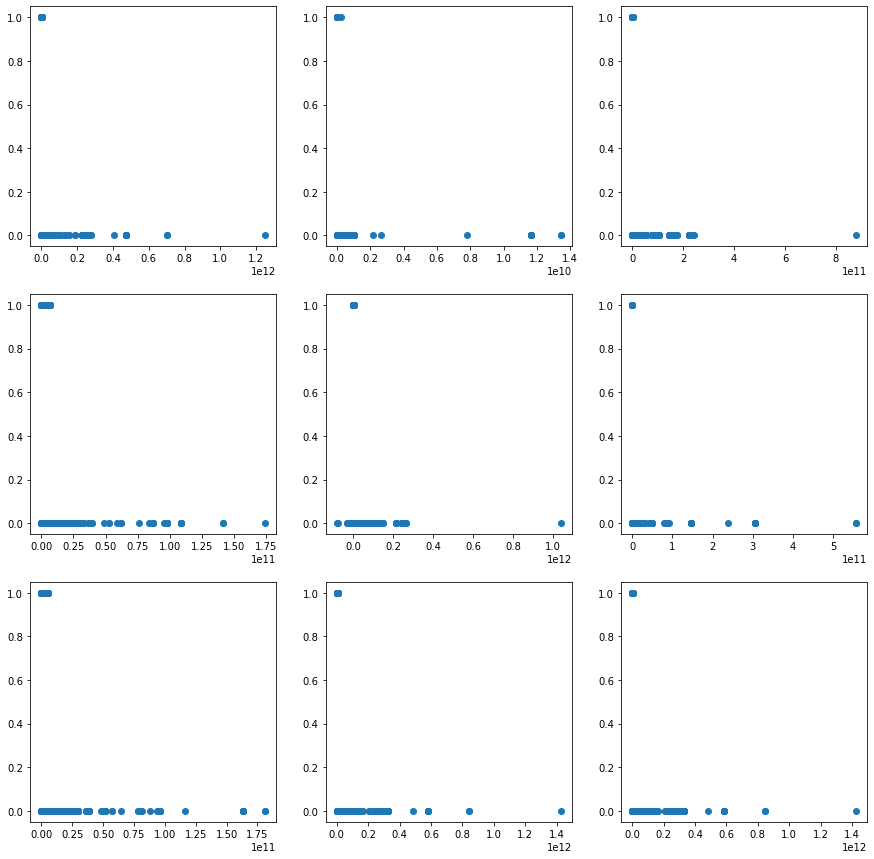

In [6]:
fig, ax = plt.subplots(3,3, figsize = (15,15))

ax[0,0].scatter(train.F1100, train.TARGET)
ax[0,1].scatter(train.F1110, train.TARGET)
ax[0,2].scatter(train.F1150, train.TARGET)
ax[1,0].scatter(train.F1200, train.TARGET)
ax[1,1].scatter(train.F1300, train.TARGET)
ax[1,2].scatter(train.F1400, train.TARGET)
ax[2,0].scatter(train.F1500, train.TARGET)
ax[2,1].scatter(train.F1600, train.TARGET)
ax[2,2].scatter(train.F1700, train.TARGET)

In [3]:
def make_date_features(data, date_columns):
    for name in date_columns: 
        if name in data.columns:
            data[name] = pd.to_datetime(data[name], format = '%d%b%Y:%H:%M:%S', errors = 'coerce')
            # fill the nan
            data[name].fillna(data[name].mean(),inplace = True)
            # if name == "SIGN_DATE":
                # data[name + '_day'] = data[name].dt.day
                # data[name + '_month'] = data[name].dt.month
                # data[name + '_dayofweek'] = data[name].dt.dayofweek
                # data[name + '_dayofyear'] = data[name].dt.dayofyear
            
    # isnull
        # data['null_in_'+ name] = data[name].isnull().astype(int)

    # diff
    def minus_shift(x):
        diff = (x-x.shift()).dt.days
        return diff.fillna(0)
    data['vari_diff'] = data.groupby('id_client')['SIGN_DATE'].apply(minus_shift)
    # data['diff_contract_order'] = (data['TAXREG_REGDATE'] - data['DATEFIRSTREG']).astype("timedelta64[D]")
    # data['SIGN_DATE_DATEFIRSTREG'] = (data['SIGN_DATE'] - data['DATEFIRSTREG']).astype("timedelta64[D]")
    
    return data

def make_bin_features(data, bin_columns):
    # isnull
    for name in bin_columns:
        # data['null_in_'+ name] = data[name].isnull().astype(int)
        # fill with mean()： binary to average
        if name in data.columns: data[name].fillna(-999,inplace = True)
    return data

def make_cat_features(data, cat_columns):
    # fill with random str:
    for name in cat_columns:
        if name in data.columns: data[name].fillna('NotANumber',inplace = True)
    # OHE 
    data = pd.get_dummies(data, columns = cat_columns)
    return data

def make_real_features(data, real_columns, fea_name):
    
    real_features = []
    
    for name in real_columns:
        if name in data.columns: data[name].fillna(data[name].mean(),inplace = True)
    data[fea_name+'_real_mean'] = data[real_columns].mean(axis=1)
    data[fea_name+'_real_std'] = data[real_columns].std(axis=1)
    real_features.append(fea_name+'_real_mean')
    real_features.append(fea_name+'_real_std')

    # isnull
    # data['null_in_'+ name] = data[name].isnull().astype(int)
    
    for name in real_columns:
        if name in data.columns: data.drop(name, axis = 1, inplace = True)
    
    return data, real_features

def make_norm(data, cols):
    for name in cols:
        # data[name] = prp.StandardScaler().fit_transform(data[[name]])
        if name in data.columns: data[name] = prp.MinMaxScaler().fit_transform(data[[name]])
    return data

def make_others(data, cols):
    data['CITIZENSHIP_NAME'] = data['CITIZENSHIP_NAME'].fillna(-1).map({'Российская Федерация': 1, 'Казахстан': 2,'Таджикистан': 3, 'Армения': 4, -1: -1,})
    data['SEX_NAME'] = data['CITIZENSHIP_NAME'].fillna(0).map({0: 0, 'мужской': 1, 'женский': -1})
    return data

def make_features(data):
    data = make_date_features(data, date_columns)
    # data = make_bin_features(data, bin_columns)
    data = make_cat_features(data, cat_columns)
    # data, r_fea1 = make_real_features(data, real_F, 'real_F')
    # data, r_fea2 = make_real_features(data, real_F_L,  'real_F_L')
    # data, r_fea3 = make_real_features(data, real_take_part_year,  'real_take_part_year')
    # data, r_fea4 = make_real_features(data, real_take_part_all_time,  'real_take_part_all_time')
    # data, r_fea5 = make_real_features(data, real_data_233, 'real_data_233')
    # data, r_fea6 = make_real_features(data, real_data_95,  'real_data_95')
    # data, r_fea7 = make_real_features(data, real_columns,  'real_columns')
    # data.drop(others, axis = 1, inplace = True)
    # r_fea_all = r_fea1 + r_fea2 # + r_fea3 + r_fea4 + r_fea5 + r_fea6 + r_fea7
    # data = make_norm(data, r_fea_all)
    
    return data

In [4]:
train_fe = make_features(train)
test_fe = make_features(test)
print(f'the shape of FE train: {train_fe.shape}, the shape of FE test: {test_fe.shape}')
train_fe.head()

the shape of FE train: (17891, 167), the shape of FE test: (7330, 166)


,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,F2340,F2350,F2400,F2410,F1150_LAG1,F1230_LAG1,F1410_LAG1,F1510_LAG1,F1520_LAG1,F2110_LAG1,F2120_LAG1,F2200_LAG1,F2210_LAG1,F2220_LAG1,F2300_LAG1,F2320_LAG1,F2330_LAG1,F2400_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKATO_REGIONCODE,OKTMO_CODE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME,vari_diff,OKFS_GROUP_NotANumber,OKFS_GROUP_Государственная собственность,OKFS_GROUP_Иностранная собственность,OKFS_GROUP_Смешенная российская собственность,OKFS_GROUP_Совместная российская и иностранная собственность,OKFS_GROUP_Частная собственность,OKOPF_GROUP_NotANumber,OKOPF_GROUP_Без прав юридического лица,OKOPF_GROUP_Коммерческая корпоративная организация,OKOPF_GROUP_Коммерческая унитарная организация,OKOPF_GROUP_Некоммерческая корпоративная организация,OKOPF_GROUP_Некоммерческая унитарная организация,OKOGU_GROUP_NotANumber,OKOGU_GROUP_Государственная власть в РФ,OKOGU_GROUP_Государственная власть в субъектах РФ,OKOGU_GROUP_Группировки хозяйствующих субъектов и общественных объединений,OKOGU_GROUP_Местное самоуправление в РФ,OKATO_FED_30.0,OKATO_FED_31.0,OKATO_FED_33.0,OKATO_FED_34.0,OKATO_FED_38.0,OKATO_FED_40.0,OKATO_FED_41.0,OKATO_FED_42.0,OKATO_FED_NotANumber,OKTMO_FED_30.0,OKTMO_FED_31.0,OKTMO_FED_33.0,OKTMO_FED_34.0,OKTMO_FED_38.0,OKTMO_FED_40.0,OKTMO_FED_41.0,OKTMO_FED_42.0,OKTMO_FED_NotANumber,WORKERSRANGE_0 .. 5,WORKERSRANGE_1001 .. 5000,WORKERSRANGE_101 .. 150,WORKERSRANGE_11 .. 15,WORKERSRANGE_151 .. 200,WORKERSRANGE_16 .. 50,WORKERSRANGE_201 .. 250,WORKERSRANGE_251 .. 500,WORKERSRANGE_5000 и более,WORKERSRANGE_501 .. 1000,WORKERSRANGE_51 .. 100,WORKERSRANGE_6 .. 10,WORKERSRANGE_NotANumber
0,1,1847,2018-01-01,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,NaN,21224000.0,1.048287e+10,105901000.0,127510000.0,9.477348e+09,440671000.0,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,1.083075e+09,656055000.0,8.834700e+07,NaN,106919000.0,293404000.0,1.122418e+09,1.479338e+09,3.908700e+07,-19204000.0,1.031700e+09,9.179060e+09,NaN,2.112180e+09,7.426504e+09,4.955724e+10,4.648680e+10,5.565080e+08,1.424790e+09,1.089145e+09,2.401140e+08,137626000.0,310096000.0,7.625800e+07,1.0,1993-08-10 00:00:00.000000000,3.0,3.701000e+09,2006-07-01 00:00:00.000000000,1960-01-01 00:00:00.000000000,5.0,1.0,0.0,8.0,7.0,7.0,3.0,0.0,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,4650,2018-01-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
test_fe.head()

,id_contract,id_client,SIGN_DATE,IP_flag,EGRPOINCLUDED,DATEFIRSTREG,TAXREG_REGDATE,TAXREGPAY_REGDATE,SIGN_DATE_day,SIGN_DATE_month,DATEFIRSTREG_day,DATEFIRSTREG_month,TAXREGPAY_REGDATE_day,TAXREGPAY_REGDATE_month,TAXREG_REGDATE_day,TAXREG_REGDATE_month,OKFS_GROUP_NotANumber,OKFS_GROUP_Государственная собственность,OKFS_GROUP_Иностранная собственность,OKFS_GROUP_Смешенная российская собственность,OKFS_GROUP_Совместная российская и иностранная собственность,OKFS_GROUP_Частная собственность,OKOPF_GROUP_NotANumber,OKOPF_GROUP_Без прав юридического лица,OKOPF_GROUP_Коммерческая корпоративная организация,OKOPF_GROUP_Коммерческая унитарная организация,OKOPF_GROUP_Некоммерческая корпоративная организация,OKOPF_GROUP_Некоммерческая унитарная организация,OKOGU_GROUP_NotANumber,OKOGU_GROUP_Государственная власть в РФ,OKOGU_GROUP_Государственная власть в субъектах РФ,OKOGU_GROUP_Группировки хозяйствующих субъектов и общественных объединений,OKOGU_GROUP_Местное самоуправление в РФ,OKATO_FED_30.0,OKATO_FED_31.0,OKATO_FED_33.0,OKATO_FED_34.0,OKATO_FED_38.0,OKATO_FED_40.0,OKATO_FED_41.0,OKATO_FED_42.0,OKATO_FED_NotANumber,OKTMO_FED_30.0,OKTMO_FED_31.0,OKTMO_FED_33.0,OKTMO_FED_34.0,OKTMO_FED_38.0,OKTMO_FED_40.0,OKTMO_FED_41.0,OKTMO_FED_42.0,OKTMO_FED_NotANumber,WORKERSRANGE_0 .. 5,WORKERSRANGE_1001 .. 5000,WORKERSRANGE_101 .. 150,WORKERSRANGE_11 .. 15,WORKERSRANGE_151 .. 200,WORKERSRANGE_16 .. 50,WORKERSRANGE_201 .. 250,WORKERSRANGE_251 .. 500,WORKERSRANGE_5000 и более,WORKERSRANGE_501 .. 1000,WORKERSRANGE_51 .. 100,WORKERSRANGE_6 .. 10,WORKERSRANGE_NotANumber,real_F_real_mean,real_F_real_std,real_F_L_real_mean,real_F_L_real_std,real_take_part_year_real_mean,real_take_part_year_real_std,real_take_part_all_time_real_mean,real_take_part_all_time_real_std,real_data_233_real_mean,real_data_233_real_std,real_data_95_real_mean,real_data_95_real_std,real_columns_real_mean,real_columns_real_std
0,17892,3620,2018-01-01,1,-999.0,1993-08-10 00:00:00.000000000,2006-07-01 00:00:00.000000000,1960-01-01 00:00:00.000000000,1,1,10,8,1,1,1,7,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5.029845e+08,5.301301e+08,5.508628e+08,5.580158e+08,1.689913e+06,2.865685e+06,3.140609e+06,4.359303e+06,7.889861e+06,1.763978e+07,3.101802e+07,7.405897e+07,1.327016,1.230912
1,17893,4101,2018-01-01,0,1.0,2010-11-18 12:32:39.485414144,2011-11-22 11:41:28.292859648,1967-02-10 16:58:03.010386928,1,1,18,11,10,2,22,11,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.598320e+08,4.541697e+08,2.204792e+08,3.306731e+08,4.000000e-01,8.944272e-01,9.453130e+05,2.113780e+06,1.871860e+07,5.320653e+07,1.325633e+08,3.731713e+08,1.300000,1.567021
2,17894,9589,2018-01-01,0,1.0,1992-02-04 00:00:00.000000000,2002-08-30 00:00:00.000000000,1960-01-01 00:00:00.000000000,1,1,4,2,1,1,30,8,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.487828e+08,4.505435e+08,1.656775e+08,2.943064e+08,4.898064e+05,9.992968e+05,5.857060e+06,1.214575e+07,4.976699e+06,1.449039e+07,1.007394e+07,3.103045e+07,1.100000,0.994429
3,17895,11546,2018-01-01,0,1.0,2005-07-01 00:00:00.000000000,2005-07-01 00:00:00.000000000,1960-01-01 00:00:00.000000000,1,1,1,7,1,1,1,7,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.643721e+08,4.586711e+08,1.426892e+08,2.520999e+08,1.689913e+06,2.865685e+06,3.140609e+06,4.359303e+06,6.000000e-01,8.432740e-01,3.101802e+07,7.405897e+07,0.600000,0.516398
4,17896,12558,2018-01-01,0,1.0,2010-11-18 12:32:39.485414144,2011-11-22 11:41:28.292859648,1967-02-10 16:58:03.010386928,1,1,18,11,10,2,22,11,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.360824e+08,4.197554e+08,2.092989e+08,3.692931e+08,1.689913e+06,2.865685e+06,3.140609e+06,4.359303e+06,7.889861e+06,1.763978e+07,3.101802e+07,7.405897e+07,1.200000,1.135292


In [33]:
for col in train_fe.columns:
    if train_fe[col].isnull().sum() != 0:
        print(col)

EGRPOINCLUDED


## Random Forest - max_depth don't need to tune

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

label_col = 'TARGET'
features_cols = train_fe.drop(['id_contract','id_client','TARGET'], axis=1).select_dtypes(include=[np.number]).columns.tolist()
len(features_cols)

156

### n_estimators = 90, max_depth = 14, min_samples_split = 50

In [7]:
# TUNING FOR n_estimators = 80
param_test1 = {'n_estimators':range(10,100,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 90}, 0.8962560249535899)

In [8]:
param_test1 = {'n_estimators':range(70,110,5)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 90}, 0.8962560249535899)

In [9]:
# TUNING FOR max_depth, min_samples_split = 13, 30

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 90, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13, 'min_samples_split': 50}, 0.9074481237609046)

In [10]:
param_test2 = {'max_depth':range(10,20,2), 'min_samples_split':range(40,60,5)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 14, 'min_samples_split': 50}, 0.9114542242514323)

In [12]:
# TUNING FOR min_samples_leaf, max_features = 9, 7

param_test3 = {'min_samples_leaf':range(3,10,1), 'max_features':range(2,5,1)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 90, max_depth = 14,
                                  min_samples_split=50 ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 4, 'min_samples_leaf': 3}, 0.9052111870655087)

### using tuned params

In [28]:
train_fe.shape

(17891, 99)

In [6]:
# use tuned paras
rf = RandomForestClassifier(n_estimators = 90, max_depth = 14, min_samples_split = 50, n_jobs = -1)

cv_baseline_score = cross_val_score(rf, train_fe[features_cols].fillna(0), train_fe[label_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

rf.fit(train_fe[features_cols].fillna(0), train_fe[label_col])

roc_auc_score: 0.9184564952356205


RandomForestClassifier(max_depth=14, min_samples_split=50, n_estimators=90,
                       n_jobs=-1)

In [7]:
# test_fe['OKATO_REGIONCODE_55.0'] = test_fe['OKATO_REGIONCODE_54.0']
test['TARGET'] = rf.predict_proba(test_fe[features_cols].fillna(0))[:, 1]

test[['id_contract', 'TARGET']].to_csv('submit_file_rf_fe_22.csv', sep=';', index=False)
test[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.090966
1,17893,0.209922
2,17894,0.264666
3,17895,0.278296
4,17896,0.412916


In [ ]:
# roc_auc_score: 0.9107683152024368

## lightgbm
 lr和n_estimators max_depth 和 num_leaves min_data_in_leaf 和 min_sum_hessian_in_leaf

In [17]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

label_col = 'TARGET'
features_cols = train_fe.drop(['id_contract','id_client','TARGET'], axis=1).select_dtypes(include=[np.number]).columns.tolist()
# features_cols = train_fe.drop(['TARGET'], axis=1).select_dtypes(include=[np.number]).columns.tolist()

In [9]:
param_test1 = {'n_estimators':range(100,300,10), 'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15]}
gsearch1 = GridSearchCV(estimator = lgb.LGBMClassifier(num_leaves = 30, max_depth = 10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.1, 'n_estimators': 190}, 0.9268280764156185)

In [11]:
param_test2 = {'num_leaves':range(10,50,10), 'max_depth': range(9,20,1)}
gsearch2 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=190), 
                       param_grid = param_test2, scoring='roc_auc',cv=5)
gsearch2.fit(train_fe[features_cols].fillna(0), train_fe[label_col])
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 14, 'num_leaves': 40}, 0.9280116011105728)

In [18]:
# tuned params

lgb_model = lgb.LGBMClassifier(num_leaves=40, max_depth = 14,
                           learning_rate=0.1,
                           n_estimators=190)
cv_baseline_score = cross_val_score(lgb_model, train_fe[features_cols].fillna(0), train_fe[label_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

lgb_model.fit(train_fe[features_cols].fillna(0), train_fe[label_col])

roc_auc_score: 0.9280116011105728


LGBMClassifier(max_depth=14, n_estimators=190, num_leaves=40)

In [14]:
test['TARGET'] = lgb_model.predict_proba(test_fe[features_cols].fillna(0))[:, 1]

test[['id_contract', 'TARGET']].to_csv('submit_file_lgb_fe_2.csv', sep=';', index=False)
test[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.085334
1,17893,0.017424
2,17894,0.011116
3,17895,0.249383
4,17896,0.868948


### log, PCA on F-fea